文章来源： https://blog.csdn.net/baidu_41605403/article/details/83006973

我们以Iris数据集（Iris）为例进行分析。Iris以鸢尾花的特征作为数据来源，数据集包含150个数据源，分为三类，每类50个数据集，每个数据包含4个属性，是在数据挖掘、数据分类中非常常用的测试集、训练集。决策树可以用于分类和回归，接下来我们将在代码中进行介绍。

1、导入所需要的包，并创建sparkcontent和session对象

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from pyspark.ml.linalg import Vectors, Vector
from pyspark.sql import Row
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark import SparkContext
from pyspark.sql.session import SparkSession

# 以下为决策树所需要的包
from pyspark.ml.classification import DecisionTreeClassificationModel, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 决策树回归模型
from pyspark.ml.regression import DecisionTreeRegressionModel, DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [2]:
try:
    sc = SparkContext('local', 'iris')
    spark = SparkSession(sc)
except:
    pass
# help(Row)
print('Initial Done at', datetime.datetime.now())

Initial Done at 2019-05-30 10:10:05.513040


In [8]:
# help(SparkContext)
# 停止sc对象
try:
    sc.stop()
    del sc
except:
    pass
print('Stop Done at', datetime.datetime.now())

Stop Done at 2019-05-30 11:01:29.268265


2、读取数据，简要分析：
    读取文本时，第一个map把每行的数据用【空格】隔开，比如在我们数据集中，每行被分成了5部分，前4部分是鸢尾花的4个特征，最后一个是分类；我们把特征存储在Vector中，创建一个Iris模式的RDD，之后转换成Dataframe；然后把刚刚得到的数据注册成一个表iris，之后就可以通过sql语句进行数据查询；选出我们要的数据后，我们把结果打印出来看一下结构。

In [3]:
def f(x):
    rel = {}
    rel['label'] = str(x[0])
    # 下面将feature按照“：” 分割字符串通过map传递总共4个给vectors
    rel['features'] = Vectors.dense(*map(lambda x: float(x.split(':')[1]), x[1:]))
    return rel

data = sc.textFile('iris.txt').map(lambda line: line.split(' ')).map(lambda p: Row(**f(p))).toDF()
data.collect()
data.createOrReplaceTempView('iris')
df = spark.sql('select * from iris')

rel = df.rdd.map(lambda t: '%s: %s' % (str(t[1]), str(t[0]))).collect()
for item in rel:
    print(item)

[Row(features=DenseVector([5.1, 3.5, 1.4, 0.2]), label='0.0'),
 Row(features=DenseVector([4.9, 3.0, 1.4, 0.2]), label='0.0'),
 Row(features=DenseVector([4.7, 3.2, 1.3, 0.2]), label='0.0'),
 Row(features=DenseVector([4.6, 3.1, 1.5, 0.2]), label='0.0'),
 Row(features=DenseVector([5.0, 3.6, 1.4, 0.2]), label='0.0'),
 Row(features=DenseVector([5.4, 3.9, 1.7, 0.4]), label='0.0'),
 Row(features=DenseVector([4.6, 3.4, 1.4, 0.3]), label='0.0'),
 Row(features=DenseVector([5.0, 3.4, 1.5, 0.2]), label='0.0'),
 Row(features=DenseVector([4.4, 2.9, 1.4, 0.2]), label='0.0'),
 Row(features=DenseVector([4.9, 3.1, 1.5, 0.1]), label='0.0'),
 Row(features=DenseVector([5.4, 3.7, 1.5, 0.2]), label='0.0'),
 Row(features=DenseVector([4.8, 3.4, 1.6, 0.2]), label='0.0'),
 Row(features=DenseVector([4.8, 3.0, 1.4, 0.1]), label='0.0'),
 Row(features=DenseVector([4.3, 3.0, 1.1, 0.1]), label='0.0'),
 Row(features=DenseVector([5.8, 4.0, 1.2, 0.2]), label='0.0'),
 Row(features=DenseVector([5.7, 4.4, 1.5, 0.4]), label=

0.0: [5.1,3.5,1.4,0.2]
0.0: [4.9,3.0,1.4,0.2]
0.0: [4.7,3.2,1.3,0.2]
0.0: [4.6,3.1,1.5,0.2]
0.0: [5.0,3.6,1.4,0.2]
0.0: [5.4,3.9,1.7,0.4]
0.0: [4.6,3.4,1.4,0.3]
0.0: [5.0,3.4,1.5,0.2]
0.0: [4.4,2.9,1.4,0.2]
0.0: [4.9,3.1,1.5,0.1]
0.0: [5.4,3.7,1.5,0.2]
0.0: [4.8,3.4,1.6,0.2]
0.0: [4.8,3.0,1.4,0.1]
0.0: [4.3,3.0,1.1,0.1]
0.0: [5.8,4.0,1.2,0.2]
0.0: [5.7,4.4,1.5,0.4]
0.0: [5.4,3.9,1.3,0.4]
0.0: [5.1,3.5,1.4,0.3]
0.0: [5.7,3.8,1.7,0.3]
0.0: [5.1,3.8,1.5,0.3]
0.0: [5.4,3.4,1.7,0.2]
0.0: [5.1,3.7,1.5,0.4]
0.0: [4.6,3.6,1.0,0.2]
0.0: [5.1,3.3,1.7,0.5]
0.0: [4.8,3.4,1.9,0.2]
0.0: [5.0,3.0,1.6,0.2]
0.0: [5.0,3.4,1.6,0.4]
0.0: [5.2,3.5,1.5,0.2]
0.0: [5.2,3.4,1.4,0.2]
0.0: [4.7,3.2,1.6,0.2]
0.0: [4.8,3.1,1.6,0.2]
0.0: [5.4,3.4,1.5,0.4]
0.0: [5.2,4.1,1.5,0.1]
0.0: [5.5,4.2,1.4,0.2]
0.0: [4.9,3.1,1.5,0.1]
0.0: [5.0,3.2,1.2,0.2]
0.0: [5.5,3.5,1.3,0.2]
0.0: [4.9,3.1,1.5,0.1]
0.0: [4.4,3.0,1.3,0.2]
0.0: [5.1,3.4,1.5,0.2]
0.0: [5.0,3.5,1.3,0.3]
0.0: [4.5,2.3,1.3,0.3]
0.0: [4.4,3.2,1.3,0.2]
0.0: [5.0,3

3、进一步处理特征和标签，以及数据分组：

In [59]:
# 分别获取标签列和特征列，进行索引，并进行了重命名
label_indexer = StringIndexer(inputCol='label', outputCol='indexedLabel')
label_indexer.fit(df)

feature_indexer = VectorIndexer(inputCol='features', outputCol='indexedFeatures', maxCategories=4)
feature_indexer.fit(df)

# 设置一个labelConverter，目的是把预测的类别重新转换成字符型的
labelConverter = IndexToString(inputCol='prediction', outputCol='predictedLabel', labels=label_indexer.labels)
# 数据集切分
training_data, test_data = data.randomSplit([0.7, 0.3])

label_indexer:  StringIndexer_8412c0946407


In [93]:
type(label_indexer)
type(df)
d = df.toPandas()
d


pyspark.ml.feature.StringIndexerModel

pyspark.sql.dataframe.DataFrame

,features,label
0,"[5.1, 3.5, 1.4, 0.2]",0.0
1,"[4.9, 3.0, 1.4, 0.2]",0.0
2,"[4.7, 3.2, 1.3, 0.2]",0.0
3,"[4.6, 3.1, 1.5, 0.2]",0.0
4,"[5.0, 3.6, 1.4, 0.2]",0.0
5,"[5.4, 3.9, 1.7, 0.4]",0.0
6,"[4.6, 3.4, 1.4, 0.3]",0.0
7,"[5.0, 3.4, 1.5, 0.2]",0.0
8,"[4.4, 2.9, 1.4, 0.2]",0.0
9,"[4.9, 3.1, 1.5, 0.1]",0.0


4、构建决策树分类模型：

In [67]:
dtclassifier = DecisionTreeClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')
# 在pipeline中进行设置
pipelinedClassifier = Pipeline(stages=[label_indexer, feature_indexer, dtclassifier, labelConverter])
# 训练决策树模型
modelClassifier = pipelinedClassifier.fit(training_data)
# 进行预测
predictionsClassifier = modelClassifier.transform(testData)
# 查看部分预测结果
# predictionsClassifier.select('predictedLabel', 'label', 'features').show(20)

In [72]:
# 查看部分预测结果
predictionsClassifier.select('predictedLabel', 'label', 'features').show(20)

+--------------+-----+-----------------+
|predictedLabel|label|         features|
+--------------+-----+-----------------+
|           0.0|  0.0|[4.4,2.9,1.4,0.2]|
|           0.0|  0.0|[4.4,3.2,1.3,0.2]|
|           0.0|  0.0|[4.6,3.4,1.4,0.3]|
|           0.0|  0.0|[4.6,3.6,1.0,0.2]|
|           0.0|  0.0|[4.8,3.4,1.6,0.2]|
|           1.0|  1.0|[4.9,2.4,3.3,1.0]|
|           0.0|  0.0|[4.9,3.0,1.4,0.2]|
|           0.0|  0.0|[5.0,3.3,1.4,0.2]|
|           0.0|  0.0|[5.0,3.6,1.4,0.2]|
|           1.0|  1.0|[5.2,2.7,3.9,1.4]|
|           0.0|  0.0|[5.2,3.5,1.5,0.2]|
|           0.0|  0.0|[5.3,3.7,1.5,0.2]|
|           0.0|  0.0|[5.4,3.9,1.3,0.4]|
|           0.0|  0.0|[5.5,3.5,1.3,0.2]|
|           1.0|  1.0|[5.6,2.5,3.9,1.1]|
|           2.0|  2.0|[5.6,2.8,4.9,2.0]|
|           1.0|  1.0|[5.6,3.0,4.1,1.3]|
|           1.0|  1.0|[5.6,3.0,4.5,1.5]|
|           1.0|  1.0|[5.7,2.8,4.1,1.3]|
|           1.0|  1.0|[5.8,2.7,3.9,1.2]|
+--------------+-----+-----------------+
only showing top

5、评估决策树分类模型：

In [73]:
evaluatorClassifier = MulticlassClassificationEvaluator(labelCol='indexedLabel', predictionCol='prediction', metricName='accuracy')
accuracy = evaluatorClassifier.evaluate(predictionsClassifier)

print('Test Error = ' + str(1.0 - accuracy))
print('Accuracy = ' + str(accuracy)
treeModelClassifier = modelClassifier.stages[2]
print("Learned classification tree model:\n" + str(treeModelClassifier.toDebugString))

Test Error = 0.021739130434782594
Learned classification tree model:
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_fec9419e0228) of depth 5 with 15 nodes
  If (feature 2 <= 2.45)
   Predict: 1.0
  Else (feature 2 > 2.45)
   If (feature 3 <= 1.65)
    If (feature 2 <= 4.95)
     Predict: 0.0
    Else (feature 2 > 4.95)
     Predict: 2.0
   Else (feature 3 > 1.65)
    If (feature 3 <= 1.75)
     If (feature 0 <= 4.95)
      Predict: 2.0
     Else (feature 0 > 4.95)
      Predict: 0.0
    Else (feature 3 > 1.75)
     If (feature 2 <= 4.85)
      If (feature 0 <= 5.95)
       Predict: 0.0
      Else (feature 0 > 5.95)
       Predict: 2.0
     Else (feature 2 > 4.85)
      Predict: 2.0



6、构建决策树回归模型

In [78]:
# 训练决策树回归模型
dtRegressor = DecisionTreeRegressor(labelCol='indexedLabel', featuresCol='indexedFeatures')
# 在pipeline中进行设置
pipelineRegressor = Pipeline(stages=[label_indexer, feature_indexer, dtRegressor, labelConverter])
# 训练决策树模型
modelRegressor = pipelineRegressor.fit(training_data)
# 进行预测
predictionsRegressor = modelRegressor.transform(test_data)
# 查看部分预测结果
predictionsRegressor.select('predictedLabel', 'label', 'features').show(20)

+--------------+-----+-----------------+
|predictedLabel|label|         features|
+--------------+-----+-----------------+
|           0.0|  0.0|[4.4,2.9,1.4,0.2]|
|           0.0|  0.0|[4.4,3.2,1.3,0.2]|
|           0.0|  0.0|[4.6,3.4,1.4,0.3]|
|           0.0|  0.0|[4.6,3.6,1.0,0.2]|
|           0.0|  0.0|[4.8,3.4,1.6,0.2]|
|           2.0|  1.0|[4.9,2.4,3.3,1.0]|
|           0.0|  0.0|[4.9,3.0,1.4,0.2]|
|           0.0|  0.0|[5.0,3.3,1.4,0.2]|
|           0.0|  0.0|[5.0,3.6,1.4,0.2]|
|           1.0|  1.0|[5.2,2.7,3.9,1.4]|
|           0.0|  0.0|[5.2,3.5,1.5,0.2]|
|           0.0|  0.0|[5.3,3.7,1.5,0.2]|
|           0.0|  0.0|[5.4,3.9,1.3,0.4]|
|           0.0|  0.0|[5.5,3.5,1.3,0.2]|
|           1.0|  1.0|[5.6,2.5,3.9,1.1]|
|           2.0|  2.0|[5.6,2.8,4.9,2.0]|
|           1.0|  1.0|[5.6,3.0,4.1,1.3]|
|           1.0|  1.0|[5.6,3.0,4.5,1.5]|
|           1.0|  1.0|[5.7,2.8,4.1,1.3]|
|           1.0|  1.0|[5.8,2.7,3.9,1.2]|
+--------------+-----+-----------------+
only showing top

7、评估决策树回归模型：

In [94]:
evaluatorRegressor = RegressionEvaluator(labelCol='indexedLabel', predictionCol='prediction', metricName='rmse')
rmse = evaluatorRegressor.evaluate(predictionsRegressor)

print("Root Mean Squared Error (RMSE) on test data = " +str(rmse))

treeModelRegressor = modelRegressor.stages[2]
print("Learned regression tree model:\n" + str(treeModelRegressor.toDebugString))


Root Mean Squared Error (RMSE) on test data = 0.5107539184552491
Learned regression tree model:
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_8a30f6f11ec9) of depth 4 with 13 nodes
  If (feature 3 <= 1.75)
   If (feature 2 <= 2.45)
    Predict: 1.0
   Else (feature 2 > 2.45)
    If (feature 0 <= 4.95)
     Predict: 2.0
    Else (feature 0 > 4.95)
     If (feature 2 <= 5.05)
      Predict: 0.0
     Else (feature 2 > 5.05)
      Predict: 2.0
  Else (feature 3 > 1.75)
   If (feature 2 <= 4.85)
    If (feature 0 <= 5.95)
     Predict: 0.0
    Else (feature 0 > 5.95)
     Predict: 2.0
   Else (feature 2 > 4.85)
    Predict: 2.0



In [79]:
predictionsRegressor.show(5)

+-----------------+-----+------------+-----------------+----------+--------------+
|         features|label|indexedLabel|  indexedFeatures|prediction|predictedLabel|
+-----------------+-----+------------+-----------------+----------+--------------+
|[4.4,2.9,1.4,0.2]|  0.0|         1.0|[4.4,2.9,1.4,0.2]|       1.0|           0.0|
|[4.4,3.2,1.3,0.2]|  0.0|         1.0|[4.4,3.2,1.3,0.2]|       1.0|           0.0|
|[4.6,3.4,1.4,0.3]|  0.0|         1.0|[4.6,3.4,1.4,0.3]|       1.0|           0.0|
|[4.6,3.6,1.0,0.2]|  0.0|         1.0|[4.6,3.6,1.0,0.2]|       1.0|           0.0|
|[4.8,3.4,1.6,0.2]|  0.0|         1.0|[4.8,3.4,1.6,0.2]|       1.0|           0.0|
+-----------------+-----+------------+-----------------+----------+--------------+
only showing top 5 rows



In [6]:
import warnings
warnings.filterwarnings('ignore')
try:
    del iris
except:
    pass
iris = data.toPandas()
i2 = iris['features'].apply(lambda l: str(l)).str.lstrip('[').str.rstrip(']').str.split(',', expand=True)
iris = iris.drop('features', axis=1).join(i2)
iris.columns=['label', '0', '1', '2', '3']
iris = iris.T.apply(pd.to_numeric).T

In [7]:
iris.head()

,label,0,1,2,3
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


In [217]:
iris['label'].value_counts()

2.0    50
1.0    50
0.0    50
Name: label, dtype: int64

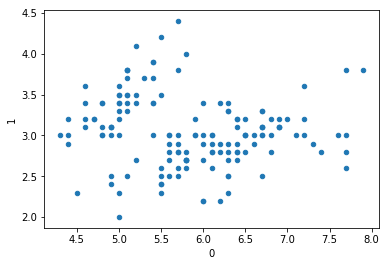

In [218]:
iris.plot(kind='scatter', x='0', y='1')

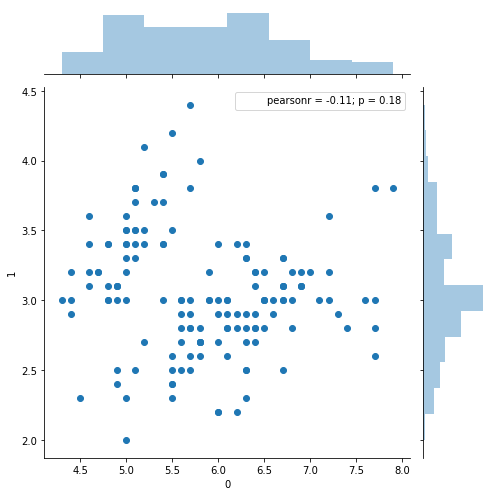

In [219]:
sns.jointplot(x='0', y='1', data=iris, size=7)

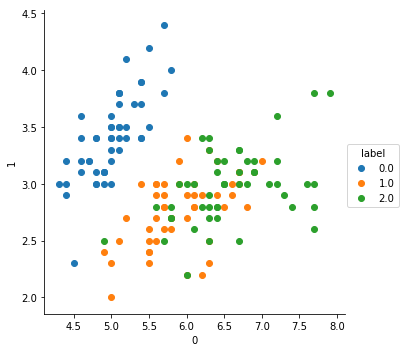

In [223]:
sns.FacetGrid(iris, hue='label', size=5).map(plt.scatter, '0', '1').add_legend()

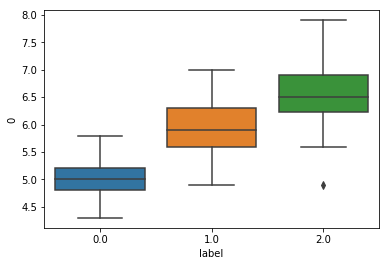

In [226]:
sns.boxplot(x='label', y='0', data=iris)

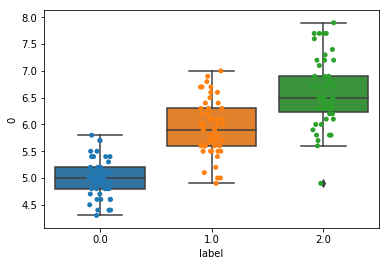

In [232]:
ax = sns.boxplot(data=iris, x='label', y='0')
ax = sns.stripplot(x='label', y='0', data=iris, jitter=True, edgecolor='gray')

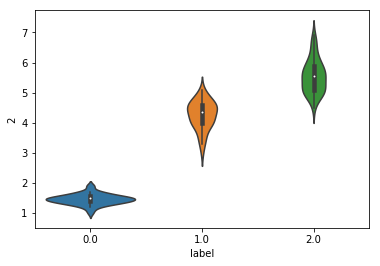

In [242]:
sns.violinplot(x='label', y='2', data=iris)

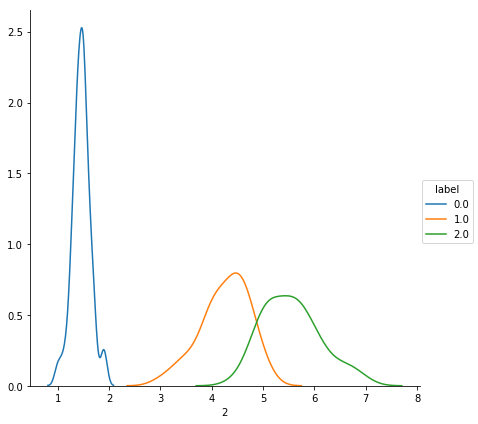

In [15]:
sns.FacetGrid(iris, hue='label', size=6).map(sns.kdeplot, '2').add_legend()

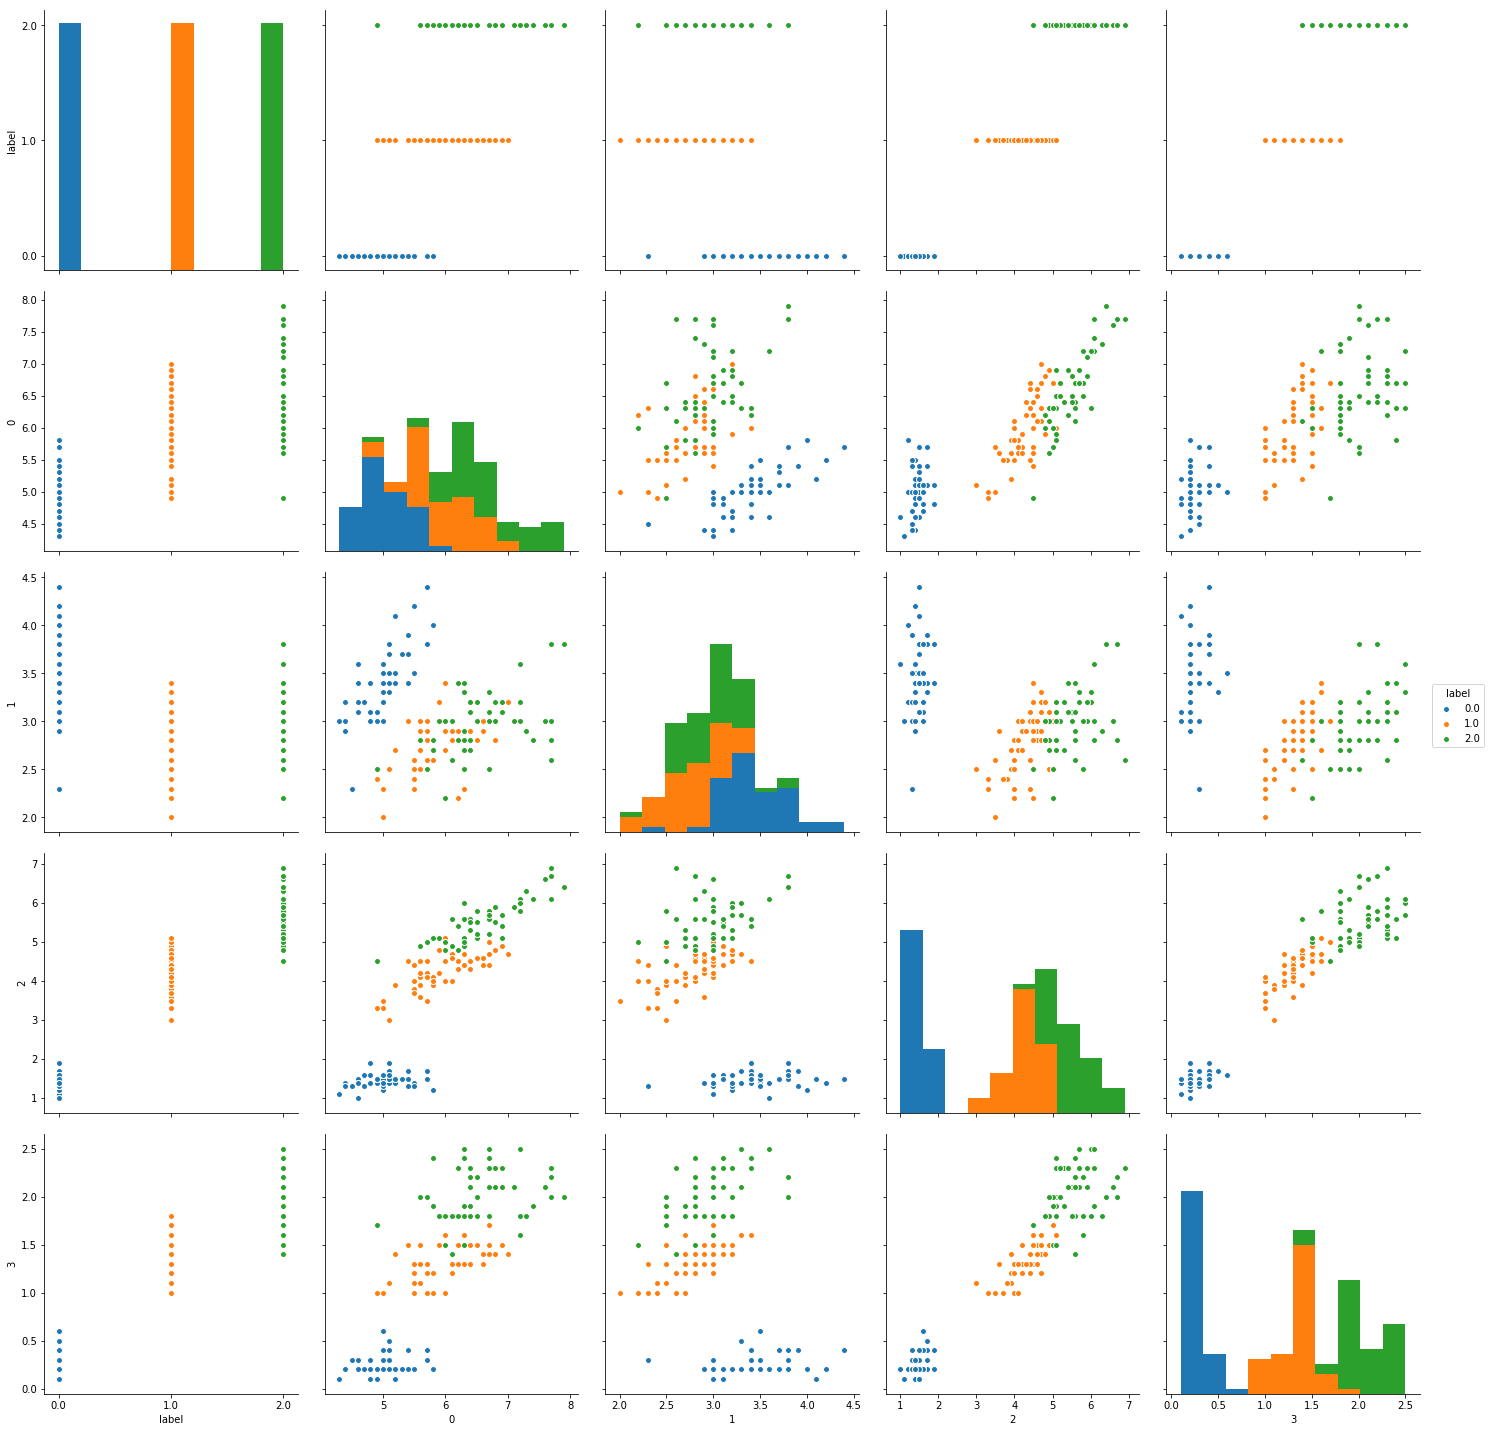

In [18]:
sns.pairplot(iris, hue='label', size=4)

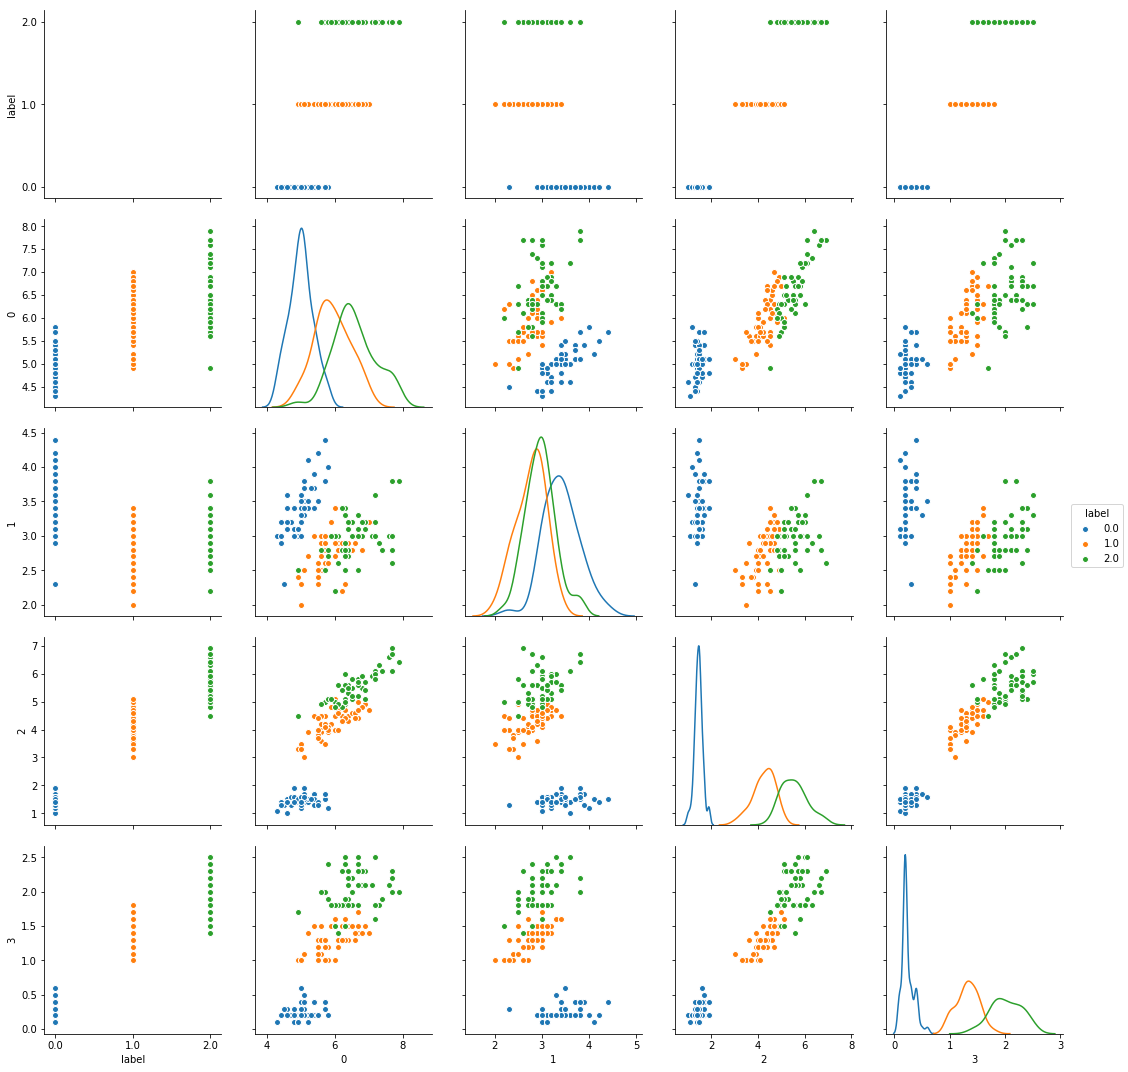

In [19]:
sns.pairplot(iris, hue='label', size=3, diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b75027240>,
      dtype=object)

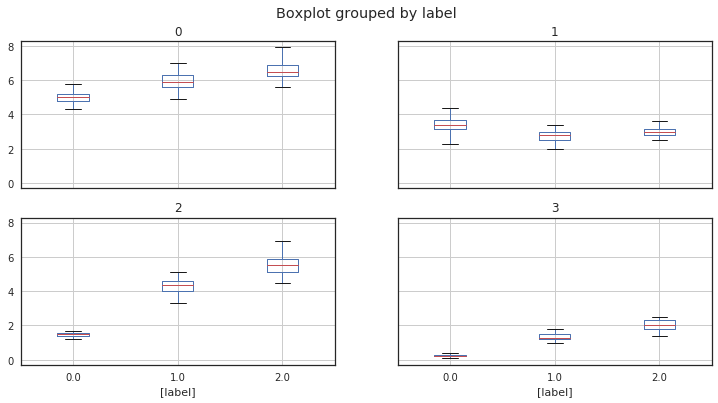

In [9]:
iris.boxplot(by='label', figsize=(12, 6))

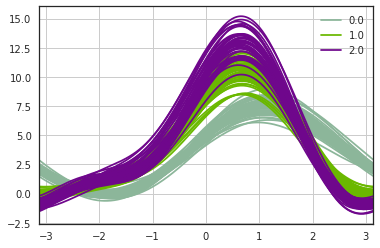

In [13]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'label')

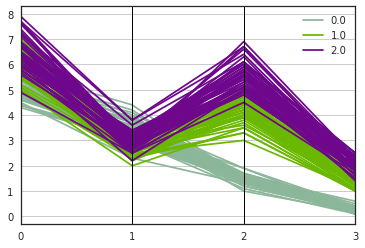

In [15]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'label')

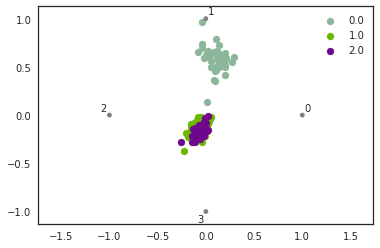

In [16]:
from pandas.tools.plotting import radviz
radviz(iris, 'label')

Help on function wrapper in module pandas.tools.plotting:

wrapper(*args, **kwargs)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b72694ef0>,
      dtype=object)

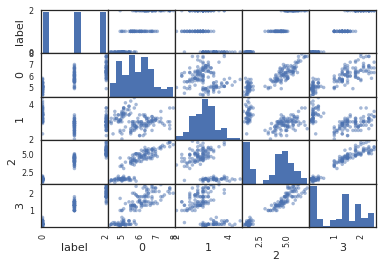

In [29]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris)